### Solution 1.1

In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt

#applying n = 1, λ_2 = 1 in the function, its gradient and hessian
#f(x)
def func(x):
    return (math.log(1+math.exp(-x))+1/2*x**2)

#gradient of f(x)
def grad(x):
    return (-(math.exp(-x)/(1+math.exp(-x)))+x)

#hessian of f(x)
def hes(x):
    return ((math.exp(-x))/(1+math.exp(-x))**2+1)

#newton's method
def newton(x_init,tol):
    niter=0
    diff=tol+1
    x_dis_n = []
    x_dis_n.append(x_init)
    while (diff>tol) & (niter<1000):
        niter=niter+1
        x_new = x_init-grad(x_init)/hes(x_init)
        diff=np.abs(x_init-x_new)
        x_init = x_new
        x_dis_n.append(x_new)
     #   print(niter,x_init)
    return(niter,x_init,x_dis_n)

#gradient descent method
def grad_des(x_init, tol):
    rate = 0.8
    niter = 0
    diff = tol+1
    x_dis_g = []
    x_dis_g.append(x_init)
    while (diff>tol) & (niter<10000):
        niter = niter+1
        x_new = x_init - rate*grad(x_init)
        diff = abs(x_new - x_init)
        x_init = x_new
        x_dis_g.append(x_new)
      #  print(niter, x_init)
    return(niter,x_init,x_dis_g)



In [71]:
#Starting initial iteration at 8 and with an absolute precision of 10^-10 for Gradient descent method
y1 = grad_des(8,10**-10)
y1

(8,
 0.40105813754156105,
 [8,
  1.6002682801043733,
  0.4544089539098488,
  0.4015321992225411,
  0.4010618544745241,
  0.40105816665131866,
  0.4010581377695229,
  0.4010581375433324,
  0.40105813754156105])

### In gradient descent min = 0.40105813754156105 with 8 iterations.

In [72]:
#Starting initial iteration at 8 and with an absolute precision of 10^-10 for Newton's method
y2 = newton(8,10**-10)
y2

(5,
 0.40105813754154707,
 [8,
  0.003016240339132281,
  0.40000018103922824,
  0.4010581161269009,
  0.40105813754154707,
  0.40105813754154707])

### In Newton's method min = 0.40105813754154707 with 5 iterations

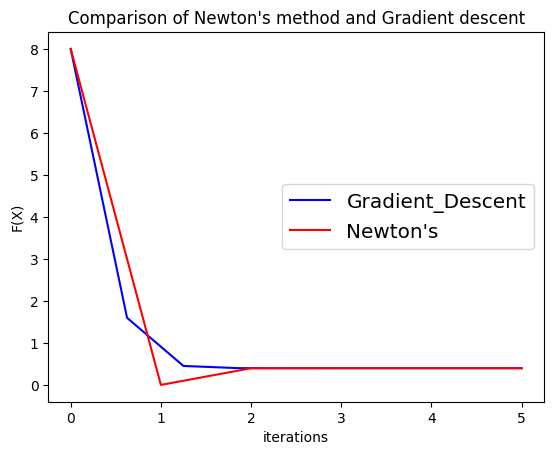

In [75]:
#plt.plot(x,y1[2], label="Gradient_Descent")
#plt.plot(x,y2[2], label="Newton's")

x1 = np.linspace(0,5,9)
x2 = np.linspace(0,5,6)

fig, ax = plt.subplots()
ax.plot(x1, y1[2], label='Gradient_Descent', color='blue')
ax.plot(x2, y2[2], label="Newton's", color = 'red')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('iterations')
plt.ylabel('F(X)')
plt.title("Comparison of Newton's method and Gradient descent")
plt.show()

### Final Conclusions:
#### We observe that the rate of convergence for Newton's method is faster than that of Gradient descent method because using Newton's method we find the minimum of the function with only 5 iterations whereas it takes 8 iterations to reach the minimum of the function using gradient descent method. Newton’s method converges quadratically fast in this case, whereas gradient descent with stepsize 1/L converges linearly.

#### When we write the Newton's method tailored to f(x) for n = 20, the hessian that we obtain is a diagonal matrix and the eigenvalues are bounded above and below. So the inverse of hessian is very cheap to compute numerically. Therefore, newton's method is easy to implement than the gradient descent method. 